# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [1129]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [1130]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [1131]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [1132]:
df_train.shape

(15223, 52)

In [1133]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [1134]:
df_test.shape

(14910, 52)

In [1135]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [1136]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [1137]:
df = df_test.append(df_train).reset_index(drop=True)

In [1138]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [1140]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неполное среднее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее специальное', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'Управляющая компания', 'Образование', 'Торговля', 'Здравоохранение', 'Развлечения/Искусство', 'Недвижимость', 'Другие сферы', 'Сельское хозяйство', 'Логистика', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Энергетика', 'Туризм', 'Наука', 'Государственная служба', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Сборочные производства', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Салоны красоты и здоровья'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [1141]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [1142]:
# Ответ:
# 1. Удалить строки с такими данными из дата фрейма. Удобнее всего. 
#    Но данных станет меньше и обучение будет менее точным.
# 2. Заполнить пропуски средними значениями (или медианой) данных по столбцу. 
#    Но если пропусков много, то обучаемая модель будет сильно усредняться
# 3. Заполнить рандомными значениями данных от мин. до макс. значений по столбцу.
#    Может сработать если пропусков не много и данные в столбце имеют большую энтропию 
#    (значения данных распределены хаотично). 
# 4. Заполнить нормальным распределением значений данных от мин. до макс. значений по столбцу.
#    Такой вариант может меньше всего повлиять на обучаемую модель.




#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [1143]:
# Ответ:
# Кодируем категориальные признаки с помощью OneHotEncoding,
# Для каждого признака создаем столько столбцов, сколько этот признак имеет значений (степеней свободы).
# В свою очередь каждая степень свободы будет принимать бинарное значение 0 или 1.


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [1144]:
# К сожалению я не смог написать функцию для следующего задания, т.к. пришел на курс без знаний Python. 
# По-этому сделал задание без нее.

# Удаляю идентификатор AGREEMENT_RK
df = df.drop(['AGREEMENT_RK'], axis=1)

# Избавляюсь от проблем с '.' и ',' в стобцах 
# PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

# Заполняю пропуски в данных самым простым сподходящим пособом: медианой
df.loc[df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].median()
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()
df = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_TITLE', 
                                 'GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
                                 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
                                 'TP_PROVINCE', 'REGION_NM'])
df.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [1145]:
df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [1146]:
# Согласно википедии целевой переменной является отклик клиента
# На сколько я понял, в нашей таблице это столбец 'Target'
A_train= df_train_preproc['TARGET'] # Обучающий столбец
B_train = df_train_preproc.drop('TARGET', axis=1) # Обучаемый массив данных
A_test = df_test_preproc['TARGET'] # Тестовый столбец результата
B_test = df_test_preproc.drop('TARGET', axis=1) # Тестовый массив данный

#### Задание 5. Обучение и оценка качества разных моделей

In [1147]:
from sklearn.cross_validation import train_test_split

In [1148]:
X_train, X_test, y_train, y_test = train_test_split(B_train, A_train, test_size=0.33, random_state=42)


In [1149]:
# Обучение по модели "дерева"
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [1150]:
# Считаем метрики по модели "дерева"
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
precision1 = precision_score(y_test, predict)
recall1 = recall_score(y_test, predict)
accuracy1 = accuracy_score(y_test, predict)

precision 0.1419939577039275
recall 0.1540983606557377
accuracy 0.7842356687898089


In [1151]:
# Считаем вероятности по модели "дерева"
predict_proba1 = model.predict_proba(X_test)
predict_proba1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

(-0.01, 1.01)

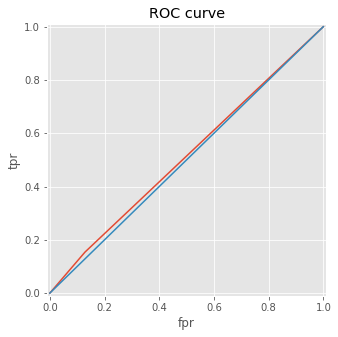

In [1152]:
# Строим кривую ROC по модели "дерева"
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba1[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [1153]:
# Считаем площадь под кривой ROC по модели "дерева"
roc_auc_score(y_test, predict_proba1[:,1])

0.5127084462997765

In [1154]:
# Обучение по модели "леса"
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [1155]:
# Считаем метрики по модели "леса"
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
precision2 = precision_score(y_test, predict)
recall2 = recall_score(y_test, predict)
accuracy2 = accuracy_score(y_test, predict)

precision 0.11538461538461539
recall 0.004918032786885246
accuracy 0.8746019108280255


In [1156]:
# Считаем вероятности по модели "леса"
predict_proba2 = model.predict_proba(X_test)
predict_proba2

array([[0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

(-0.01, 1.01)

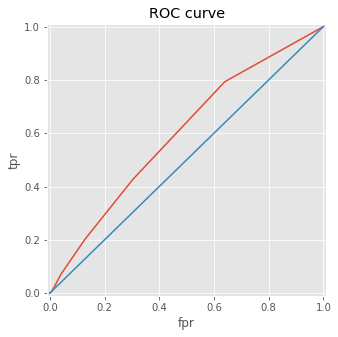

In [1157]:
# Строим кривую ROC по модели "леса"
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba2[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [1158]:
# Считаем площадь под кривой ROC по модели "леса"
roc_auc_score(y_test, predict_proba2[:,1])

0.596495316689817

In [1159]:
# Обучение по модели "регрессии"
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [1160]:
# Считаем метрики по модели "регрессии"
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
precision3 = precision_score(y_test, predict)
recall3 = recall_score(y_test, predict)
accuracy3 = accuracy_score(y_test, predict)

precision 0.42857142857142855
recall 0.004918032786885246
accuracy 0.8783837579617835


In [1161]:
# Считаем вероятности по модели "регрессии"
predict_proba3 = model.predict_proba(X_test)
predict_proba3

array([[0.73009862, 0.26990138],
       [0.94260999, 0.05739001],
       [0.7946864 , 0.2053136 ],
       ...,
       [0.95645055, 0.04354945],
       [0.94180728, 0.05819272],
       [0.86296851, 0.13703149]])

(-0.01, 1.01)

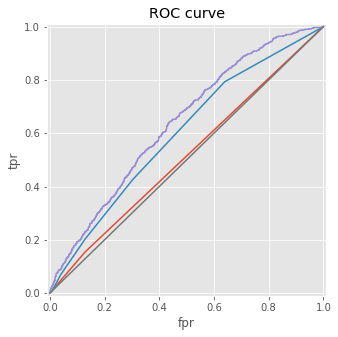

In [1162]:
# Строим кривые ROC по всем трем моделям
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds = roc_curve(y_test, predict_proba2[:,1])
fpr3, tpr3, thresholds = roc_curve(y_test, predict_proba3[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [1163]:
# Считаем площадь под кривой ROC по модели "регрессии"
roc_auc_score(y_test, predict_proba3[:,1])

0.6368336217846345

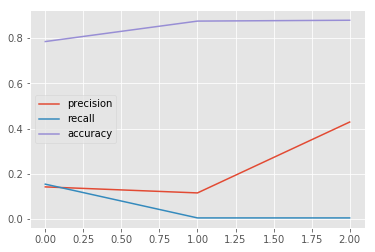

In [1164]:
import matplotlib.pyplot as plt
import seaborn as sns
k = pd.DataFrame({
    'precision' :  [precision1, precision2, precision3],
    'recall' : [recall1, recall2, recall3],
    'accuracy' : [accuracy1, accuracy2, accuracy3] 
                })
k.plot()

In [1165]:
# Делаем k-fold (10 фолдов) кросс-валидацию каждой модели
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
a = cross_val_score(
    rfc,
    B_train, 
    A_train,
    scoring='roc_auc',
    cv=10
)
a.mean()

0.5767827423677886

In [1166]:
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()
b = cross_val_score(
    dtc,
    B_train, 
    A_train,
    scoring='roc_auc',
    cv=10
)
b.mean()

0.5287795531216939

In [1167]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
c = cross_val_score(
    lr,
    B_train, 
    A_train,
    scoring='roc_auc',
    cv=10
)
c.mean()

0.6415725169732807

In [1168]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(B_train, A_train)
predict = model.predict(B_test) # Обучаем и предсказываем на исходных таблицах

In [1169]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
print('precision', precision_score(A_test, predict))
print('recall', recall_score(A_test, predict))
print('accuracy', accuracy_score(A_test, predict))

precision 0.1
recall 0.0005714285714285715
accuracy 0.8820925553319919


In [1170]:
predict_proba4 = model.predict_proba(B_test)
roc_auc_score(A_test, predict_proba4[:,1])

0.6259327399044724

(-0.01, 1.01)

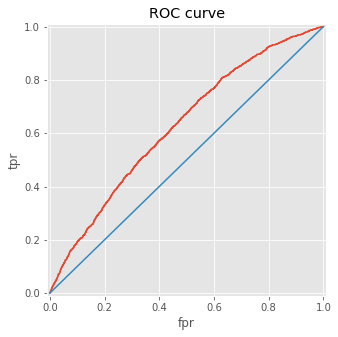

In [1172]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr4, tpr4, thresholds = roc_curve(A_test, predict_proba4[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr4, tpr4)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [1175]:
# Добавим стодбец с расчитанными вероятностями для тестового массива данных, для наглядности
df_test_preproc['VEROIATNOST'] = predict_proba4[:,1]
df_test_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,VEROIATNOST
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0.152999
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,1,0,0,0,0.056930
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,1,0,0,0.181704
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0.231289
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,0,0,0.142375
